In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

2023-03-21 20:21:54.704968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('CPU'))>0)

True


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [66]:
training_set = train_datagen.flow_from_directory('training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6107 images belonging to 3 classes.


In [67]:
test_set = test_datagen.flow_from_directory('validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 2461 images belonging to 3 classes.


In [68]:
import os

folder_path = 'validation//Center_frames'

num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"There are {num_files} files in the {folder_path} folder.")


There are 820 files in the validation//Center_frames folder.


In [37]:
import os
import random
import shutil
src_paths = ['Road/Center_frames', 'Road/Left_frames', 'Road/Right_frames']
train_paths = ['training/Center_frames', 'training/Left_frames', 'training/Right_frames']
val_paths = ['validation/Center_frames', 'validation/Left_frames', 'validation/Right_frames']

num_images = 1025
train_frac = 0.8  

for src_path, train_path, val_path in zip(src_paths, train_paths, val_paths):
 
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)
    
    image_files = os.listdir(src_path)
    image_files = [os.path.join(src_path, f) for f in image_files if f.endswith('.jpg')]

    num_train = int(num_images * train_frac)
    train_files = random.sample(image_files, num_train)
    val_files = list(set(image_files) - set(train_files))

    for f in train_files:
        shutil.move(f, os.path.join(train_path, os.path.basename(f)))
    for f in val_files:
        shutil.move(f, os.path.join(val_path, os.path.basename(f)))


In [70]:
IMAGE_SIZE = [224, 224]
train_path = 'train'
valid_path = 'validation'

In [71]:
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [72]:
for layer in densenet.layers:
    layer.trainable = False

In [73]:

x = Flatten()(densenet.output)

In [74]:
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=densenet.input, outputs=prediction)

In [76]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [77]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [78]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/home/u185822/tmp/ipykernel_2752242/675562961.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
191/191 [==============================] - 360s 2s/step - loss: 0.2085 - accuracy: 0.9720 - val_loss: 2.9013e-06 - val_accuracy: 1.0000
Epoch 2/5
191/191 [==============================] - 360s 2s/step - loss: 0.2085 - accuracy: 0.9720 - val_loss: 2.9013e-06 - val_accuracy: 1.0000
Epoch 2/5
191/191 [==============================] - 360s 2s/step - loss: 0.2085 - accuracy: 0.9720 - val_loss: 2.9013e-06 - val_accuracy: 1.0000
Epoch 2/5
191/191 [==============================] - 360s 2s/step - loss: 0.2085 - accuracy: 0.9720 - val_loss: 2.9013e-06 - val_accuracy: 1.0000
Epoch 2/5
191/191 [==============================] - 360s 2s/step - loss: 0.2085 - accuracy: 0.9720 - val_loss: 2.9013e-06 - val_accuracy: 1.0000
Epoch 2/5
191/191 [==============================] - 360s 2s/step - loss: 0.2085 - accuracy: 0.9720 - val_loss: 2.9013e-06 - val_accuracy: 1.0000
Epoch 2/5
191/191 [==============================] - 360s 2s/step - loss: 0.2085 - accuracy: 0.9720 - val_loss: 2.9013e-06 -

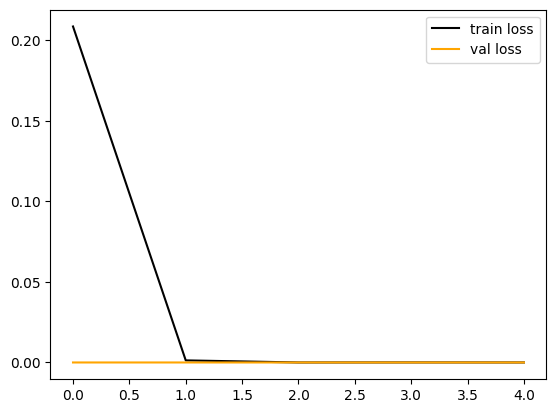

<Figure size 640x480 with 0 Axes>

In [80]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="orange")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


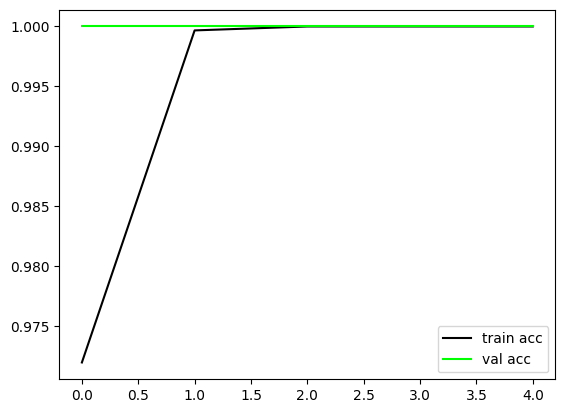

<Figure size 640x480 with 0 Axes>

In [81]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="lime")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [95]:
from tensorflow.keras.models import load_model

model.save('model_DenseNet121.h5')

In [96]:
model=load_model('model_DenseNet121.h5')

In [97]:
y_pred = model.predict(test_set)
y_pred

77/77 [==============================] - 53s 672ms/step


array([[9.9999994e-01, 4.2760973e-08, 9.6593905e-12],
       [9.9999934e-01, 5.8303687e-07, 8.3689333e-11],
       [9.9999958e-01, 3.1267450e-07, 1.5989675e-11],
       ...,
       [3.7025202e-08, 1.2698518e-05, 9.9998724e-01],
       [2.5152824e-10, 7.4102413e-06, 9.9999261e-01],
       [4.7236282e-10, 1.8639779e-05, 9.9998140e-01]], dtype=float32)

In [98]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 2, 2, 2])

In [136]:
import os
path ='validation'
Road_types=os.listdir(path)

In [139]:
road = []
for i in Road_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    road.append((i))
print (road[:1000]) 

['Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frames', 'Center_frame

In [146]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(2461,-1)
y_labelencoder = LabelEncoder()

In [143]:
y_test = y_labelencoder.fit_transform (road)
y_test

array([0, 0, 0, ..., 2, 2, 2])

In [151]:
y_test = y_test[:-2]

In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[820,   1,   0],
       [  0, 820,   1],
       [  0,   0, 819]])

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       821
           1       1.00      1.00      1.00       821
           2       1.00      1.00      1.00       819

    accuracy                           1.00      2461
   macro avg       1.00      1.00      1.00      2461
weighted avg       1.00      1.00      1.00      2461



In [159]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [160]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['center','left','right'], 
                     columns = ['center','left','right'])

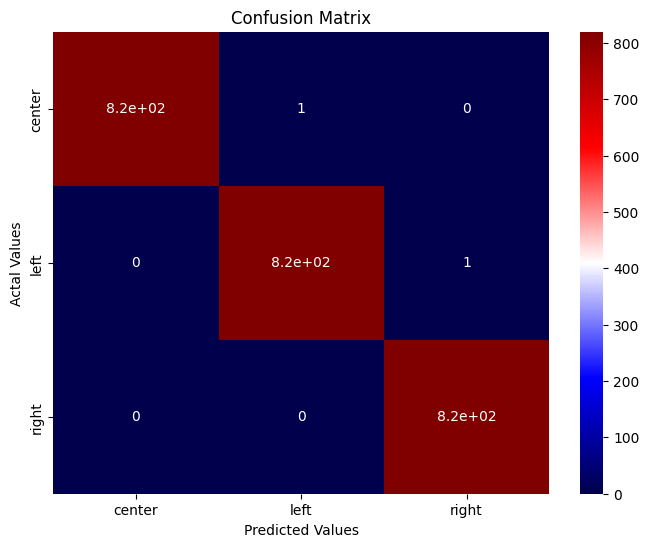

In [185]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="seismic")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [164]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [166]:
img=image.load_img('test_img.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

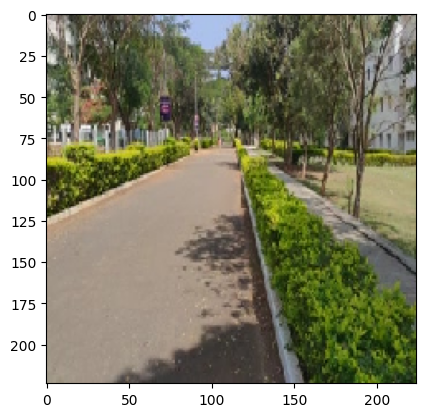

In [168]:
from matplotlib.pyplot import imshow
imshow(img)

In [171]:
import cv2
x=x/255
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [173]:
model.predict(x)

1/1 [==============================] - 2s 2s/step


array([[1.222038e-08, 8.127343e-05, 9.999187e-01]], dtype=float32)